# System Specification

In [1]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   24G   85G  22% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G 1005M  952M  52% /usr/sbin/docker-init
tmpfs           6.4G   88K  6.4G   1% /var/colab
/dev/sda1        41G   25G   16G  61% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [2]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2200.220
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4400.44
clflush size	: 64
cache_alignment	: 64
addres

In [3]:
!cat /proc/meminfo

MemTotal:       13294256 kB
MemFree:         9443320 kB
MemAvailable:   12163276 kB
Buffers:           62556 kB
Cached:          2851880 kB
SwapCached:            0 kB
Active:           833360 kB
Inactive:        2793812 kB
Active(anon):       1048 kB
Inactive(anon):   713088 kB
Active(file):     832312 kB
Inactive(file):  2080724 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              1912 kB
Writeback:             0 kB
AnonPages:        711964 kB
Mapped:           280524 kB
Shmem:              1400 kB
KReclaimable:      96040 kB
Slab:             130776 kB
SReclaimable:      96040 kB
SUnreclaim:        34736 kB
KernelStack:        4464 kB
PageTables:        14756 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6647128 kB
Committed_AS:    1968160 kB
VmallocTotal:   34359738367 kB
VmallocUsed:        9428 kB
VmallocChunk:          0 kB
Percpu:          

# Environment settings

PySpark installation

In [4]:
!pip install pyspark -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


Loading all the libraries used in the project

In [5]:
#importing the required pyspark library
import pyspark
from pyspark import SparkConf
from pyspark.sql import SparkSession
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.sql.functions import split
from pyspark.sql.functions import array_contains
from pyspark.sql.functions import col
from pyspark.sql.functions import from_json
from pyspark.sql.functions import when
from pyspark.sql import functions as F
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import Normalizer
from pyspark.ml.linalg import Vectors
from pyspark.sql import Row
from pyspark.sql.window import Window
#import for manage global var
import os
#import for graphics
import matplotlib.pyplot as plt
import pandas as pd
#import for regular expression
import re
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

Create envirorment pySpark and import libraries

In [6]:
# create a SparkConf object
conf = SparkConf()
conf.set("spark.kryoserializer.buffer.max", "1GB")
# Enable eager evaluation to show all rows
conf.set("spark.sql.repl.eagerEval.enabled", True)
conf.set("spark.sql.pivotMaxValues", "180000")
conf.set("spark.executor.memory", "4g")
conf.set("spark.driver.memory", "8g")

# create a SparkSession with the configuration
spark = SparkSession.builder.config(conf=conf).getOrCreate()

#Setup Spark Session
spark


# Dataset management

Kaggle API and Donwload Datasets

Please remember to put your Kaggle credential before executing the cell.

In [7]:
os.environ['KAGGLE_USERNAME'] = "X"
os.environ['KAGGLE_KEY'] = "X"

In [8]:
!kaggle datasets download -d yelp-dataset/yelp-dataset

100% 4.06G/4.07G [00:51<00:00, 51.1MB/s]
100% 4.07G/4.07G [00:51<00:00, 85.0MB/s]


In [9]:
! unzip "/content/yelp-dataset.zip" -d yelp-dataset

Archive:  /content/yelp-dataset.zip
  inflating: yelp-dataset/Dataset_User_Agreement.pdf  
  inflating: yelp-dataset/yelp_academic_dataset_business.json  
  inflating: yelp-dataset/yelp_academic_dataset_checkin.json  
  inflating: yelp-dataset/yelp_academic_dataset_review.json  
  inflating: yelp-dataset/yelp_academic_dataset_tip.json  
  inflating: yelp-dataset/yelp_academic_dataset_user.json  


# Loading data using Pyspark

Creations of Pyspark Dataframes

In [10]:
df_review = spark.read.json('/content/yelp-dataset/yelp_academic_dataset_review.json')

In [11]:
df_review = df_review.withColumnRenamed('stars', 'stars_review')
df_review = df_review.select("review_id","user_id","business_id","stars_review")

In [12]:
df_review.show(5)

+--------------------+--------------------+--------------------+------------+
|           review_id|             user_id|         business_id|stars_review|
+--------------------+--------------------+--------------------+------------+
|KU_O5udG6zpxOg-Vc...|mh_-eMZ6K5RLWhZyI...|XQfwVwDr-v0ZS3_Cb...|         3.0|
|BiTunyQ73aT9WBnpR...|OyoGAe7OKpv6SyGZT...|7ATYjTIgM3jUlt4UM...|         5.0|
|saUsX_uimxRlCVr67...|8g_iMtfSiwikVnbP2...|YjUWPpI6HXG530lwP...|         3.0|
|AqPFMleE6RsU23_au...|_7bHUi9Uuf5__HHc_...|kxX2SOes4o-D3ZQBk...|         5.0|
|Sx8TMOWLNuJBWer-0...|bcjbaE6dDog4jkNY9...|e4Vwtrqf-wpJfwesg...|         4.0|
+--------------------+--------------------+--------------------+------------+
only showing top 5 rows



In [13]:
df_users = spark.read.json('/content/yelp-dataset/yelp_academic_dataset_user.json')

In [14]:
df_users = df_users.withColumnRenamed('name', 'username')
df_users = df_users.select("average_stars","username","user_id")

In [15]:
df_users.show(5)

+-------------+--------+--------------------+
|average_stars|username|             user_id|
+-------------+--------+--------------------+
|         3.91|  Walker|qVc8ODYU5SZjKXVBg...|
|         3.74|  Daniel|j14WgRoU_-2ZE1aw1...|
|         3.32|   Steph|2WnXYQFK0hXEoTxPt...|
|         4.27|    Gwen|SZDeASXq7o05mMNLs...|
|         3.54|   Karen|hA5lMy-EnncsH4JoR...|
+-------------+--------+--------------------+
only showing top 5 rows



In [16]:
df_business = spark.read.json('/content/yelp-dataset/yelp_academic_dataset_business.json')
columns_to_drop = ["hours","latitude","longitude","postal_code","review_count"]
df_business = df_business.drop(*columns_to_drop)
df_business.show(5)

+--------------------+--------------------+--------------------+--------------------+-------------+-------+--------------------+-----+-----+
|             address|          attributes|         business_id|          categories|         city|is_open|                name|stars|state|
+--------------------+--------------------+--------------------+--------------------+-------------+-------+--------------------+-----+-----+
|1616 Chapala St, ...|{null, null, null...|Pns2l4eNsfO8kk83d...|Doctors, Traditio...|Santa Barbara|      0|Abby Rappoport, L...|  5.0|   CA|
|87 Grasso Plaza S...|{null, null, null...|mpf3x-BjTdTEA3yCZ...|Shipping Centers,...|       Affton|      1|       The UPS Store|  3.0|   MO|
|5255 E Broadway Blvd|{null, null, null...|tUFrWirKiKi_TAnsV...|Department Stores...|       Tucson|      0|              Target|  3.5|   AZ|
|         935 Race St|{null, null, u'no...|MTSW4McQd7CbVtyjq...|Restaurants, Food...| Philadelphia|      1|  St Honore Pastries|  4.0|   PA|
|       101 W

# Exploring the dataset by visualization

Visualization of the data

In [17]:
# Pyspark df conversion into Pandas df
df_business_pandas = df_business.toPandas()

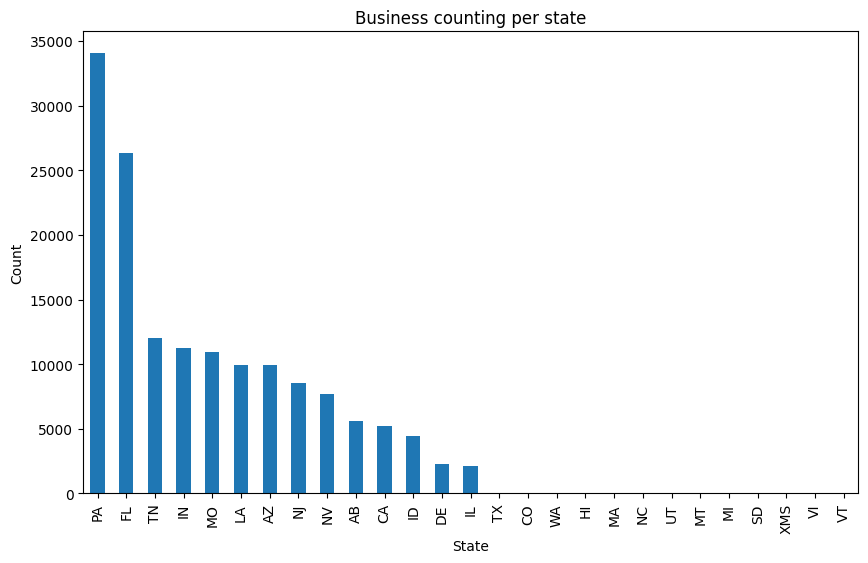

In [18]:
# Counting business for each state
state_counts = df_business_pandas['state'].value_counts()

# Plot the data
plt.figure(figsize=(10, 6))
state_counts.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Business counting per state')
plt.show()

Due the high dimension of the df it's difficult to create others type of graphics.

# Data filtering & Pandas conversion

Based on the visualization of the data I'm proceeding to create a recomender system for Pennsylvania that contains more businesses. Then I consider only open businesses.

However I put a variable called *state* in order to choose in which states you want to run the Recomender System and a variable called *type_business* to change categories.

In [19]:
state = 'PA'

In [20]:
type_business='Restaurant.*'

In [21]:
# Filtering data
restaurant_df = df_business_pandas[(df_business_pandas['state'] == state) & (df_business_pandas['is_open'] == 1) & df_business_pandas['categories'].str.contains(type_business)==True].reset_index()

In [22]:
restaurant_df

,index,address,attributes,business_id,categories,city,is_open,name,stars,state
0,3,935 Race St,"(None, None, u'none', None, None, None, None, ...",MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",Philadelphia,1,St Honore Pastries,4.0,PA
1,15,205 Race St,"(None, None, 'full_bar', {'touristy': False, '...",MUTTqe8uqyMdBl186RmNeA,"Sushi Bars, Restaurants, Japanese",Philadelphia,1,Tuna Bar,4.0,PA
2,19,1224 South St,"(None, None, u'none', {'touristy': False, 'hip...",ROeacJQwBeh05Rqg7F6TCg,"Korean, Restaurants",Philadelphia,1,BAP,4.5,PA
3,33,10 Rittenhouse Pl,"(None, None, u'none', {'romantic': False, 'int...",kV_Q1oqis8Qli8dUoGpTyQ,"Pizza, Restaurants",Ardmore,1,Ardmore Pizza,3.5,PA
4,35,901 N Delaware Ave,"(None, None, None, {'touristy': False, 'hipste...",aPNXGTDkf-4bjhyMBQxqpQ,"Eatertainment, Arts & Entertainment, Brewpubs,...",Philadelphia,1,Craft Hall,3.5,PA
...,...,...,...,...,...,...,...,...,...,...
8067,150269,3 Main St,"(None, None, None, {'touristy': False, 'hipste...",2dVJ7R-3JMmu2v4DJYtBbw,"Nightlife, Cafes, Hotels, Bars, Hotels & Trave...",Schwenksville,1,Spring Mount Hotel,2.0,PA
8068,150297,600 Baltimore Pike,"(None, None, None, {'touristy': False, 'hipste...",Wko0HNelt55ZIp3Dm3eD2g,"Convenience Stores, Sandwiches, Restaurants, F...",Springfield,1,Swiss Farms Store,3.5,PA
8069,150306,6024 Ridge Ave,"(None, None, u'none', {'touristy': None, 'hips...",wVxXRFf10zTTAs11nr4xeA,"Restaurants, Specialty Food, Food, Sandwiches,...",Philadelphia,1,PrimoHoagies,3.0,PA
8070,150325,19 N Bishop Ave,"(None, None, None, None, None, None, None, Tru...",l9eLGG9ZKpLJzboZq-9LRQ,"Restaurants, Sandwiches, Convenience Stores, C...",Clifton Heights,1,Wawa,3.0,PA


In [23]:
restaurant_df_sel = restaurant_df[['name','stars']]
restaurant_df_sel

,name,stars
0,St Honore Pastries,4.0
1,Tuna Bar,4.0
2,BAP,4.5
3,Ardmore Pizza,3.5
4,Craft Hall,3.5
...,...,...
8067,Spring Mount Hotel,2.0
8068,Swiss Farms Store,3.5
8069,PrimoHoagies,3.0
8070,Wawa,3.0


# Data Preprocessing

Attributes extraction 

In [24]:
print(restaurant_df['attributes'][0])

Row(AcceptsInsurance=None, AgesAllowed=None, Alcohol="u'none'", Ambience=None, BYOB=None, BYOBCorkage=None, BestNights=None, BikeParking='True', BusinessAcceptsBitcoin=None, BusinessAcceptsCreditCards='False', BusinessParking="{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}", ByAppointmentOnly='False', Caters='True', CoatCheck=None, Corkage=None, DietaryRestrictions=None, DogsAllowed=None, DriveThru=None, GoodForDancing=None, GoodForKids=None, GoodForMeal=None, HairSpecializesIn=None, HappyHour=None, HasTV=None, Music=None, NoiseLevel=None, Open24Hours=None, OutdoorSeating='False', RestaurantsAttire=None, RestaurantsCounterService=None, RestaurantsDelivery='False', RestaurantsGoodForGroups=None, RestaurantsPriceRange2='1', RestaurantsReservations=None, RestaurantsTableService=None, RestaurantsTakeOut='True', Smoking=None, WheelchairAccessible=None, WiFi="u'free'")


From the format Row I want to extract key-value pairs

In [25]:
# Function for extracting key-value from attributes
def extract_values(row):
    if row is None or row == "{}":
        return {}
    
    attributes = {}
    pattern = r"(\w+)\s*=\s*([^,]+)"
    matches = re.findall(pattern, row)
    
    for key, value in matches:
        value = value.strip("'")
        attributes[key] = value
    
    return attributes

# Apply the function over all the rows of column attributes
restaurant_df['attributes'] = restaurant_df['attributes'].apply(str).apply(extract_values)


In [26]:
# Show the results

In [27]:
restaurant_df['attributes']

0       {'AcceptsInsurance': 'None', 'AgesAllowed': 'N...
1       {'AcceptsInsurance': 'None', 'AgesAllowed': 'N...
2       {'AcceptsInsurance': 'None', 'AgesAllowed': 'N...
3       {'AcceptsInsurance': 'None', 'AgesAllowed': 'N...
4       {'AcceptsInsurance': 'None', 'AgesAllowed': 'N...
                              ...                        
8067    {'AcceptsInsurance': 'None', 'AgesAllowed': 'N...
8068    {'AcceptsInsurance': 'None', 'AgesAllowed': 'N...
8069    {'AcceptsInsurance': 'None', 'AgesAllowed': 'N...
8070    {'AcceptsInsurance': 'None', 'AgesAllowed': 'N...
8071    {'AcceptsInsurance': 'None', 'AgesAllowed': 'N...
Name: attributes, Length: 8072, dtype: object

In [28]:
# dummy variables matrix from categories column
df_categories_dm = pd.Series(restaurant_df['categories']).str.get_dummies(',')

In [29]:
df_categories_dm

,Acai Bowls,Accessories,Accountants,Active Life,Adult,Adult Entertainment,Afghan,African,Airport Lounges,Airport Shuttles,...,Venues & Event Spaces,Video Game Stores,Vietnamese,Waffles,Wedding Planning,Wheel & Rim Repair,Wine Bars,Wineries,Wraps,Yoga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8068,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8069,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8070,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Extract unique keys in "attributes"
unique_keys = set()
restaurant_df_attr = pd.DataFrame()
def extract_keys(attributes):
    if attributes:
        unique_keys.update(attributes.keys())

restaurant_df['attributes'].apply(extract_keys)

# Create a column for each key and populate it with 0 or 1
for key in unique_keys:
    restaurant_df_attr[key] = restaurant_df['attributes'].apply(lambda x: 1 if x and key in x and x[key] == 'True' else 0)


In [31]:
restaurant_df_attr

,BusinessParking,DietaryRestrictions,BYOBCorkage,RestaurantsTakeOut,RestaurantsPriceRange2,Open24Hours,DriveThru,GoodForKids,RestaurantsCounterService,BusinessAcceptsCreditCards,...,OutdoorSeating,Ambience,DogsAllowed,ByAppointmentOnly,BYOB,BikeParking,RestaurantsReservations,HasTV,BestNights,Corkage
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0
3,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0
4,0,0,0,1,0,0,0,1,0,1,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8068,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
8069,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0
8070,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


Construction of the total df ready to be used for the recomender system

In [32]:
df_total = pd.concat([restaurant_df_attr, df_categories_dm, restaurant_df_sel], axis=1)
df_total.drop('Restaurants',inplace=True,axis=1)

In [33]:
df_total

,BusinessParking,DietaryRestrictions,BYOBCorkage,RestaurantsTakeOut,RestaurantsPriceRange2,Open24Hours,DriveThru,GoodForKids,RestaurantsCounterService,BusinessAcceptsCreditCards,...,Vietnamese,Waffles,Wedding Planning,Wheel & Rim Repair,Wine Bars,Wineries,Wraps,Yoga,name,stars
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,St Honore Pastries,4.0
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,Tuna Bar,4.0
2,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,BAP,4.5
3,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,Ardmore Pizza,3.5
4,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,Craft Hall,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Spring Mount Hotel,2.0
8068,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,Swiss Farms Store,3.5
8069,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,PrimoHoagies,3.0
8070,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,Wawa,3.0


Last adjustament , convert the floating rate into integer

In [34]:
convert_float_to_int = {1.0:1,1.5:2, 2.0:2, 2.5:3, 3.0:3, 3.5:4, 4.0:4, 4.5:5, 5.0:5}
df_total['stars'] = df_total['stars'].map(convert_float_to_int)

In [35]:
df_total

,BusinessParking,DietaryRestrictions,BYOBCorkage,RestaurantsTakeOut,RestaurantsPriceRange2,Open24Hours,DriveThru,GoodForKids,RestaurantsCounterService,BusinessAcceptsCreditCards,...,Vietnamese,Waffles,Wedding Planning,Wheel & Rim Repair,Wine Bars,Wineries,Wraps,Yoga,name,stars
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,St Honore Pastries,4
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,Tuna Bar,4
2,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,BAP,5
3,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,Ardmore Pizza,4
4,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,Craft Hall,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Spring Mount Hotel,2
8068,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,Swiss Farms Store,4
8069,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,PrimoHoagies,3
8070,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,Wawa,3


# Businesses similarity recommandation with Pandas and cosine similarity

Build the recomender system based on the cosine similarity

In [36]:
restaurant_index = 8071  # Index of restaurant of interest
restaurant_name = df_total.iloc[restaurant_index]['name']

print("Ristorante di riferimento:", restaurant_name)

Ristorante di riferimento: Adelita Taqueria & Restaurant


In [37]:
# Convert stars for consider it as attribute
convert_stars = {0:0,1:0,2:0,3:0,4:1,5:1}
features_df = df_total.drop(['name'], axis=1)
features_df['stars'].map(convert_stars)

0       1
1       1
2       1
3       1
4       1
       ..
8067    0
8068    1
8069    0
8070    0
8071    1
Name: stars, Length: 8072, dtype: int64

In [38]:
def cosine_similarity_scratch(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm_vector1 = np.linalg.norm(vector1)
    norm_vector2 = np.linalg.norm(vector2)
    
    if norm_vector1 == 0 or norm_vector2 == 0:
        return 0.0
    
    similarity = dot_product / (norm_vector1 * norm_vector2)
    return similarity


In [39]:
restaurant_features = features_df.iloc[restaurant_index, 6:-2].values  # Reference restaurant feature vector

similarities = []
for i in range(len(features_df)):
    if i != restaurant_index:
        other_restaurant_features = features_df.iloc[i, 6:-2].values
        similarity = cosine_similarity_scratch(restaurant_features, other_restaurant_features)
        similarities.append(similarity)

similarities = np.array(similarities)
similar_restaurants = similarities.argsort()[::-1]  # Similar restaurant ordered in a desc way

# Visualize 5 top suggested restaurants with cosine sim column
top_similar_restaurants = similar_restaurants[:5]
recommended_restaurants = df_total.iloc[top_similar_restaurants][['name', 'stars']]
recommended_restaurants['cosine_similarity'] = similarities[top_similar_restaurants]

print(recommended_restaurants)


                             name  stars  cosine_similarity
5990  San Antonio Mexican cousine      5           1.000000
6813              El Charro Negro      4           0.942809
7109      Los Taquitos de Puebla       4           0.942809
3292        El Limon - Norristown      4           0.904534
3534             Los Cuatro Soles      5           0.888889


In [40]:
features_df = df_total.drop(['name', 'stars'], axis=1)

In [41]:
similarity_matrix = cosine_similarity(features_df)

In [42]:
# Similar restaurant in desc similarity order
similar_restaurants = similarity_matrix[restaurant_index].argsort()[::-1]  
similarities_lib = []
# Visualize top 5 similar restaurant by excluding the referred one
top_similar_restaurants = similar_restaurants[1:6]
recommended_restaurants = df_total.iloc[top_similar_restaurants]

print("Ristoranti Raccomandati:")
for i, restaurant in recommended_restaurants.iterrows():
    restaurant_name = restaurant['name']
    restaurant_start = restaurant['stars']
    similarity = similarity_matrix[restaurant_index, i]
    similarities_lib.append(similarity)
    print(f"{restaurant_name} (Cosine Similarity: {similarity}) stars: {restaurant_start}")


Ristoranti Raccomandati:
San Antonio Mexican cousine (Cosine Similarity: 0.9999999999999999) stars: 5
Los Taquitos de Puebla  (Cosine Similarity: 0.9486832980505138) stars: 4
El Charro Negro (Cosine Similarity: 0.9486832980505138) stars: 4
El Limon - Norristown (Cosine Similarity: 0.9128709291752769) stars: 4
Plaza Garibaldi (Cosine Similarity: 0.8999999999999999) stars: 4


# Businesses similarity recommendation based on K-NN algorithm

Let's build the recomender system by using the K-NN algorithm

In [43]:
# Create X (all the features) and y (target)
X = df_total.iloc[:,:-2]
y = df_total['stars']

Splitting of the data in train e test set

In [44]:
# Split the data into train and test sets
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2, random_state=1)

Apply the 5-fold cross-validation to estimate the best k for the K-NN

In [45]:
# model KNN creation
knn = KNeighborsClassifier()

# k value to test
k_values = [5, 10, 15, 20, 25]

# scores list to save perfomance results
scores = []

# cross-validation application for each k value
for k in k_values:
    knn.n_neighbors = k
    # 5-fold cross-validation
    cv_scores = cross_val_score(knn, X_train_knn, y_train_knn, cv=5) 
    scores.append(cv_scores.mean())

# Find the k value that maximize the performance avg
best_k = k_values[scores.index(max(scores))]

print(f"Best k value: {best_k}")


Best k value: 20


Fitting the model and printing of the results

In [46]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_knn, y_train_knn)


import pickle
# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_KNN_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(knn, file)

accuracy_train = knn.score(X_train_knn, y_train_knn)
accuracy_test = knn.score(X_test_knn, y_test_knn)

print(f"Score on training set: {accuracy_train}")
print(f"Score on test set: {accuracy_test}")

Score on training set: 0.5624903205823137
Score on test set: 0.5219814241486068


Testing the model and use the last row as the validation test

In [47]:
# test set from the df_final table (only last row): 
test_set = df_total.iloc[-1:,:-2]

# validation set from the df_final table (exclude the last row)
X_val =  df_total.iloc[:-1,:-2]
y_val = df_total['stars'].iloc[:-1]

In [48]:
# fit model with validation set
n_knn = knn.fit(X_val, y_val)

In [49]:
# distances and indeces from validation set (Shanghai Noodle House)
distances, indeces =  n_knn.kneighbors(test_set)
#n_knn.kneighbors(test_set)[1][0]

# create table distances and indeces from "Shanghai Noodle House"
final_table = pd.DataFrame(n_knn.kneighbors(test_set)[0][0], columns = ['distance'])
final_table['index'] = n_knn.kneighbors(test_set)[1][0]
final_table.set_index('index')

,distance
index,
5990,0.000000
7109,1.000000
6813,1.000000
1817,1.414214
7382,1.414214
4715,1.414214
2049,1.414214
1094,1.414214
5479,1.414214


Getting the similar restaurants compared with the one taken in the validation test

In [50]:
# get names of the restaurant that similar to the one selected
result = final_table.join(df_total,on='index')
result[['distance','index','name','stars']].head(5)

,distance,index,name,stars
0,0.000000,5990,San Antonio Mexican cousine,5
1,1.000000,7109,Los Taquitos de Puebla,4
2,1.000000,6813,El Charro Negro,4
3,1.414214,1817,El Limon - Bensalem,5
4,1.414214,7382,Los Mariachis,4


# Businesses similarity recommendation with PySpark and cosine similarity

Content based recomender system in PySpark

In [51]:
df_business.show()

+--------------------+--------------------+--------------------+--------------------+--------------+-------+--------------------+-----+-----+
|             address|          attributes|         business_id|          categories|          city|is_open|                name|stars|state|
+--------------------+--------------------+--------------------+--------------------+--------------+-------+--------------------+-----+-----+
|1616 Chapala St, ...|{null, null, null...|Pns2l4eNsfO8kk83d...|Doctors, Traditio...| Santa Barbara|      0|Abby Rappoport, L...|  5.0|   CA|
|87 Grasso Plaza S...|{null, null, null...|mpf3x-BjTdTEA3yCZ...|Shipping Centers,...|        Affton|      1|       The UPS Store|  3.0|   MO|
|5255 E Broadway Blvd|{null, null, null...|tUFrWirKiKi_TAnsV...|Department Stores...|        Tucson|      0|              Target|  3.5|   AZ|
|         935 Race St|{null, null, u'no...|MTSW4McQd7CbVtyjq...|Restaurants, Food...|  Philadelphia|      1|  St Honore Pastries|  4.0|   PA|
|     

Create a list of categories

In [52]:
df_business_spark = df_business.withColumn("categories_list", split(df_business["categories"], ",")).drop(df_business["categories"])

In [53]:
df_business_spark.show()

+--------------------+--------------------+--------------------+--------------+-------+--------------------+-----+-----+--------------------+
|             address|          attributes|         business_id|          city|is_open|                name|stars|state|     categories_list|
+--------------------+--------------------+--------------------+--------------+-------+--------------------+-----+-----+--------------------+
|1616 Chapala St, ...|{null, null, null...|Pns2l4eNsfO8kk83d...| Santa Barbara|      0|Abby Rappoport, L...|  5.0|   CA|[Doctors,  Tradit...|
|87 Grasso Plaza S...|{null, null, null...|mpf3x-BjTdTEA3yCZ...|        Affton|      1|       The UPS Store|  3.0|   MO|[Shipping Centers...|
|5255 E Broadway Blvd|{null, null, null...|tUFrWirKiKi_TAnsV...|        Tucson|      0|              Target|  3.5|   AZ|[Department Store...|
|         935 Race St|{null, null, u'no...|MTSW4McQd7CbVtyjq...|  Philadelphia|      1|  St Honore Pastries|  4.0|   PA|[Restaurants,  Fo...|
|     

Data filtering based on the data exploration. PA seems from the graphics to have more business then the other. Indeed I selected only the open business (=1) and filtered as Restaurants. You can choose which business you want based on the category list.

In [54]:
df_business_spark = df_business_spark.filter((df_business_spark.state =='PA') & (df_business_spark.is_open == 1) & (array_contains(df_business_spark['categories_list'], 'Restaurants')))


In [55]:
df_business_spark.count()

2385

In [56]:
restaurant_df_sel_spark = df_business_spark[['business_id','name','stars']]
restaurant_df_sel_spark.show()

+--------------------+--------------------+-----+
|         business_id|                name|stars|
+--------------------+--------------------+-----+
|MTSW4McQd7CbVtyjq...|  St Honore Pastries|  4.0|
|ABxoFuzZy5mqQ8C5F...|        Core de Roma|  5.0|
|ppFCk9aQkM338Rgwp...|                Wawa|  3.0|
|3BJxm-HnvzdwD1zjm...|Golden Chopstick ...|  3.0|
|pmuuoDqNZp7518AUd...|Bagelicious - Kin...|  3.5|
|bTve2mwLk5Zc01vRK...|Red Hook Coffee &...|  4.5|
|aNXw3PkXVt8ANwLyC...|          McDonald's|  1.5|
|GVqXNt0HKJLpciN9e...| Crown Fried Chicken|  2.5|
|dChRGpit9fM_kZK5p...|            The Love|  4.0|
|CPgWuWGZ4v2sZr5_-...|            Checkers|  2.0|
|yFqq66GxRjnhZXPgj...|                 KFC|  2.0|
|0l_njS4wGMadAk1b4...|        Panera Bread|  2.5|
|kGjpBqAqG4mIuFSgU...|The Royal Indian ...|  4.0|
|kLSEk3qXY1KdtFjxH...|          McDonald's|  1.5|
|dBCNUSbz5-8nQNrxW...|Blue Sage Vegetar...|  4.5|
|kq5Ghhh14r-eCxlVm...|   The Coventry Deli|  4.0|
|K5ffo0hkwhG33BDNQ...|Slate Bleu Restau...|  4.0|


I noticed that the column attributes need to be preprocessed in order to be used.

In [57]:
df_business_spark.select("attributes").show(truncate = False)

+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|attributes                                                                                                                                                                                                                                                                                                                                                                                                    

Attributes extraction

In [58]:
# Select the struct column and extract the key-value pairs
df_business_attr_spark = df_business_spark.select("business_id",*(col("attributes").getItem(key).alias(key) for key in df_business_spark.select("attributes.*").columns))

# Show the resulting key-value pairs
df_business_attr_spark.show(truncate=False)

+----------------------+----------------+-----------+-----------+----------------------------------------------------------------------------------------------------------------------------------------------------------------+----+-----------+----------+-----------+----------------------+--------------------------+----------------------------------------------------------------------------------------+-----------------+------+---------+-------+-------------------+-----------+---------+--------------+-----------+---------------------------------------------------------------------------------------------------------------+-----------------+---------+-----+-----+----------+-----------+--------------+-----------------+-------------------------+-------------------+------------------------+----------------------+-----------------------+-----------------------+------------------+-------+--------------------+-------+
|business_id           |AcceptsInsurance|AgesAllowed|Alcohol    |Ambience   

Again, some columns has nested attributes. So with *extract_nested_attributes* function the data will be processed and extracted as a new column of the dataset

In [59]:
#preprocessing of nested attributes
def extract_nested_attributes(df, column_name, attribute_columns):
    # Parse the nested column into a MapType column
    df = df.withColumn(f"{column_name}_map", from_json(col(column_name), "map<string, boolean>"))
    
    # Extract individual attributes into separate columns
    for attribute in attribute_columns:
        df = df.withColumn(attribute, col(f"{column_name}_map")[attribute])
    
    # Drop the original nested column and map column if desired
    df = df.drop(column_name, f"{column_name}_map")
    
    return df


Preprocessing for Ambience column

In [60]:
# Define the list of attribute columns to extract
ambience_attributes = ['romantic', 'intimate', 'classy', 'hipster', 'divey', 'touristy', 'trendy', 'upscale', 'casual']

# Apply the function to extract attributes from the "Ambience" column
df_business_attr_spark = extract_nested_attributes(df_business_attr_spark, "Ambience", ambience_attributes)

# Show the resulting DataFrame with new columns
df_business_attr_spark.show(truncate=False)


+----------------------+----------------+-----------+-----------+----+-----------+----------+-----------+----------------------+--------------------------+----------------------------------------------------------------------------------------+-----------------+------+---------+-------+-------------------+-----------+---------+--------------+-----------+---------------------------------------------------------------------------------------------------------------+-----------------+---------+-----+-----+----------+-----------+--------------+-----------------+-------------------------+-------------------+------------------------+----------------------+-----------------------+-----------------------+------------------+-------+--------------------+-------+--------+--------+------+-------+-----+--------+------+-------+------+
|business_id           |AcceptsInsurance|AgesAllowed|Alcohol    |BYOB|BYOBCorkage|BestNights|BikeParking|BusinessAcceptsBitcoin|BusinessAcceptsCreditCards|BusinessPark

Preprocessing for Business Parking column

In [61]:
# Solve nested attributes over BusinessParking column
# Define the list of attribute columns to extract
business_parking_attributes = ['garage', 'street', 'validated', 'lot', 'valet']

# Apply the function to extract attributes from the "Ambience" column
df_business_attr_spark = extract_nested_attributes(df_business_attr_spark, "BusinessParking", business_parking_attributes)

# Show the resulting DataFrame with new columns
df_business_attr_spark.show(truncate=False)


+----------------------+----------------+-----------+-----------+----+-----------+----------+-----------+----------------------+--------------------------+-----------------+------+---------+-------+-------------------+-----------+---------+--------------+-----------+---------------------------------------------------------------------------------------------------------------+-----------------+---------+-----+-----+----------+-----------+--------------+-----------------+-------------------------+-------------------+------------------------+----------------------+-----------------------+-----------------------+------------------+-------+--------------------+-------+--------+--------+------+-------+-----+--------+------+-------+------+------+------+---------+----+-----+
|business_id           |AcceptsInsurance|AgesAllowed|Alcohol    |BYOB|BYOBCorkage|BestNights|BikeParking|BusinessAcceptsBitcoin|BusinessAcceptsCreditCards|ByAppointmentOnly|Caters|CoatCheck|Corkage|DietaryRestrictions|Dog

Preprocessing for Good For Meal column

In [62]:
# Solve nested attributes over GoodForMeal column
# Define the list of attribute columns to extract
good_for_meal_attributes = ['dessert', 'latenight', 'lunch', 'dinner', 'brunch','breakfast']

# Apply the function to extract attributes from the "Ambience" column
df_business_attr_spark = extract_nested_attributes(df_business_attr_spark, "GoodForMeal", good_for_meal_attributes)

# Show the resulting DataFrame with new columns
df_business_attr_spark.show(truncate=False)


+----------------------+----------------+-----------+-----------+----+-----------+----------+-----------+----------------------+--------------------------+-----------------+------+---------+-------+-------------------+-----------+---------+--------------+-----------+-----------------+---------+-----+-----+----------+-----------+--------------+-----------------+-------------------------+-------------------+------------------------+----------------------+-----------------------+-----------------------+------------------+-------+--------------------+-------+--------+--------+------+-------+-----+--------+------+-------+------+------+------+---------+----+-----+-------+---------+-----+------+------+---------+
|business_id           |AcceptsInsurance|AgesAllowed|Alcohol    |BYOB|BYOBCorkage|BestNights|BikeParking|BusinessAcceptsBitcoin|BusinessAcceptsCreditCards|ByAppointmentOnly|Caters|CoatCheck|Corkage|DietaryRestrictions|DogsAllowed|DriveThru|GoodForDancing|GoodForKids|HairSpecializesIn|

Converting the values of the columns in 0-1 

In [63]:
# Loop through each column and update the values
for column in df_business_attr_spark.columns:
  if column != "business_id":
    df_business_attr_spark = df_business_attr_spark.withColumn(
        column,
        when(col(column) == "null", 0)
        .when(col(column) == "u'full_bar'", 1)
        .when(col(column) == "'yes_free'", 1)
        .when(col(column) == "'u'free''", 1)
        .when(col(column) == "'free'",1)
        .when(col(column) == "False", 0)
        .when(col(column) == "True", 1)
        .otherwise(0)
    )

# Show the updated DataFrame
df_business_attr_spark.show(truncate=False)


+----------------------+----------------+-----------+-------+----+-----------+----------+-----------+----------------------+--------------------------+-----------------+------+---------+-------+-------------------+-----------+---------+--------------+-----------+-----------------+---------+-----+-----+----------+-----------+--------------+-----------------+-------------------------+-------------------+------------------------+----------------------+-----------------------+-----------------------+------------------+-------+--------------------+----+--------+--------+------+-------+-----+--------+------+-------+------+------+------+---------+---+-----+-------+---------+-----+------+------+---------+
|business_id           |AcceptsInsurance|AgesAllowed|Alcohol|BYOB|BYOBCorkage|BestNights|BikeParking|BusinessAcceptsBitcoin|BusinessAcceptsCreditCards|ByAppointmentOnly|Caters|CoatCheck|Corkage|DietaryRestrictions|DogsAllowed|DriveThru|GoodForDancing|GoodForKids|HairSpecializesIn|HappyHour|Ha

------------------

Categories 0-1 df

In [64]:
# Explode the categories array column to create multiple rows
df_categories_explode = df_business_spark.select("business_id", F.explode("categories_list").alias("category"))

# Pivot the exploded column to create the dummy variables matrix
df_categories_dm = df_categories_explode.groupBy("business_id").pivot("category").agg(F.lit(1)).fillna(0)

In [65]:
df_categories_dm = df_categories_dm.drop("Restaurants")
df_categories_dm.show()

+--------------------+-----------+------------+------+-------+--------+---------------+-----------------------+-------+--------+----------+---------------------+-------------+-----------+-------+---------+------------+---------+-----+----------------+-----+---------+-------------+--------+---------------+--------+----------+-------------------+----------+---------+--------+-----------+--------+--------+--------+--------+------+----------+-------------+----------+----------+----------+--------+---------+-------------+-------------+-------------+--------------+--------+---------------------+--------------+-------------+------------------+-------------+-------------------+--------------------+--------------+----------+------+---------+-------------+------+------------+------+---------+--------+-------+---------------+----------+--------------------+----------+-------+-----------+--------------+----------+------------+--------------------------+--------+---------------+------+----------+--

Construction of the final df obtained by join.

In [66]:
df_final_spark = df_categories_dm.join(df_business_attr_spark, on='business_id', how="inner").join(restaurant_df_sel_spark, on='business_id',how="inner")

In [67]:
df_final_spark.printSchema()

root
 |-- business_id: string (nullable = true)
 |--  Acai Bowls: integer (nullable = true)
 |--  Active Life: integer (nullable = true)
 |--  Adult: integer (nullable = true)
 |--  Afghan: integer (nullable = true)
 |--  African: integer (nullable = true)
 |--  American (New): integer (nullable = true)
 |--  American (Traditional): integer (nullable = true)
 |--  Arabic: integer (nullable = true)
 |--  Arcades: integer (nullable = true)
 |--  Argentine: integer (nullable = true)
 |--  Arts & Entertainment: integer (nullable = true)
 |--  Asian Fusion: integer (nullable = true)
 |--  Automotive: integer (nullable = true)
 |--  Bagels: integer (nullable = true)
 |--  Bakeries: integer (nullable = true)
 |--  Bangladeshi: integer (nullable = true)
 |--  Barbeque: integer (nullable = true)
 |--  Bars: integer (nullable = true)
 |--  Bed & Breakfast: integer (nullable = true)
 |--  Beer: integer (nullable = true)
 |--  Beer Bar: integer (nullable = true)
 |--  Beer Gardens: integer (nullab

Converting stars from floating number to integer

In [68]:
from pyspark.sql.functions import col, when
# Map floating number stars into integer
# Create a dictionary to map floating-point stars to integers
stars_toint = {1.0: 1, 1.5: 2, 2.0: 2, 2.5: 3, 3.0: 3, 3.5: 4, 4.0: 4, 4.5: 5, 5.0: 5}

# Use the 'when' and 'otherwise' functions to apply the mapping
df_final_spark = df_final_spark.withColumn('stars', when(col('stars').isin(list(stars_toint.keys())), col('stars')).otherwise(0))
df_final_spark = df_final_spark.replace(stars_toint, subset='stars')


In [69]:
df_final_spark.show()

+--------------------+-----------+------------+------+-------+--------+---------------+-----------------------+-------+--------+----------+---------------------+-------------+-----------+-------+---------+------------+---------+-----+----------------+-----+---------+-------------+--------+---------------+--------+----------+-------------------+----------+---------+--------+-----------+--------+--------+--------+--------+------+----------+-------------+----------+----------+----------+--------+---------+-------------+-------------+-------------+--------------+--------+---------------------+--------------+-------------+------------------+-------------+-------------------+--------------------+--------------+----------+------+---------+-------------+------+------------+------+---------+--------+-------+---------------+----------+--------------------+----------+-------+-----------+--------------+----------+------------+--------------------------+--------+---------------+------+----------+--

Build the recomender system based on the cosine similarity in PySpark

In [70]:
# Exclude the 'business_id' column from df_final
columns = [c for c in df_final_spark.columns if c != 'business_id']

# Convert binary values to integers
df_numeric = df_final_spark.select(['business_id'] + [col(c).cast('integer') for c in columns])

# Fill NaN values with 0
df_filled = df_numeric.fillna(0, subset=columns)

# Use VectorAssembler to create a feature vector column
assembler = VectorAssembler(inputCols=columns, outputCol='features')
df_matrix = assembler.transform(df_filled).select('business_id', 'features')


In [71]:
df_matrix.show(5)

+--------------------+--------------------+
|         business_id|            features|
+--------------------+--------------------+
|2UDJpaTsYHu9CXmbU...|(291,[184,241,250...|
|lpbt16sSm4BTcfeq4...|(291,[47,241,250,...|
|R6n618g5agn5lYIp3...|(291,[50,62,85,18...|
|-ZzCVD9Ge7KCy4ffh...|(291,[32,85,115,2...|
|zbYmalSB_TiWWh44M...|(291,[6,17,151,19...|
+--------------------+--------------------+
only showing top 5 rows



In [72]:
df_matrix.count()

2385

Experimenting the recomender system using the same restaurant of the Content based system in Pandas

In [73]:
restaurant_df_sel_spark.filter(col('name')=='Adelita Taqueria & Restaurant' ).select('business_id').take(1)

[Row(business_id='WnT9NIzQgLlILjPT0kEcsQ')]

In [74]:
ID_DEL_RISTORANTE_DI_RIFERIMENTO = 'WnT9NIzQgLlILjPT0kEcsQ'

In [75]:
restaurant_df_sel_spark.filter(col('business_id')== ID_DEL_RISTORANTE_DI_RIFERIMENTO).show()

+--------------------+--------------------+-----+
|         business_id|                name|stars|
+--------------------+--------------------+-----+
|WnT9NIzQgLlILjPT0...|Adelita Taqueria ...|  4.5|
+--------------------+--------------------+-----+



Adapting the cosine simalirity function for spark

In [76]:
def cosine_similarity_spark(vector1, vector2):
    vector1 = np.array(vector1).reshape(1, -1)
    vector2 = np.array(vector2).reshape(1, -1)
    
    dot_product = np.dot(vector1, vector2.T)
    norm_vector1 = np.linalg.norm(vector1)
    norm_vector2 = np.linalg.norm(vector2)
    
    if norm_vector1 == 0 or norm_vector2 == 0:
        return 0.0
    
    similarity = dot_product / (norm_vector1 * norm_vector2)
    
    # Handle cases where the similarity is slightly greater than 1 or less than -1
    similarity = np.maximum(-1, np.minimum(1, similarity))
    
    return similarity


Choose how many restaurant you want to recomend.

In [77]:
num_top_recom = 15

Calculate the similarity based on the reference business

In [78]:
# cosine imilarity calculation (interest restaurant,others)
reference_business_id = ID_DEL_RISTORANTE_DI_RIFERIMENTO
reference_restaurant = df_matrix.filter(col("business_id") == reference_business_id).select("features").first()[0]
similarities = df_matrix.rdd.map(lambda row: (row.business_id, cosine_similarity_spark(reference_restaurant, row.features)))


In [79]:
# Filters similar restaurants by excluding the reference restaurant
similar_restaurants = similarities.filter(lambda x: x[0] != reference_business_id)
# Sort restaurants by similarity in descending order
similar_restaurants = similar_restaurants.sortBy(lambda x: x[1], ascending=False)

In [80]:
# Get the first num_top_recom similar restaurants
similar_restaurants = similar_restaurants.take(num_top_recom)
# Create a list of rows for the DataFrame of similar restaurants
rows = [Row(business_id=r[0], cosine_similarity=r[1].tolist()) for r in similar_restaurants]
# Create the DataFrame of similar restaurants
similar_restaurants_df = spark.createDataFrame(rows)

In [81]:
similar_restaurants_df.columns

['business_id', 'cosine_similarity']

In [82]:
# Merge the DataFrame of similar restaurants with the original DataFrame to get all the information
similar_restaurants_df = similar_restaurants_df.join(restaurant_df_sel_spark, on='business_id',how='inner')

In [83]:
similar_restaurants_df.columns

['business_id', 'cosine_similarity', 'name', 'stars']

Displaying the similar restaurant respect the target and ordering it in a descending manner by the cosine similarity

In [84]:
similar_restaurants_df = similar_restaurants_df.orderBy(col("cosine_similarity").desc())
# Display the entire DataFrame
similar_restaurants_df.show(truncate=False)


+----------------------+----------------------+---------------------------+-----+
|business_id           |cosine_similarity     |name                       |stars|
+----------------------+----------------------+---------------------------+-----+
|F2QwLwzS3vF9os0_EBobXA|[[1.0]]               |San Antonio Mexican cousine|4.5  |
|DwOhLOd9Say7BXn5iBKxZA|[[0.9803789354850793]]|Los Taquitos de Puebla     |3.5  |
|EoQiJ5D-pyWczjElN24oZg|[[0.9714285714285714]]|El Primo Taqueria          |4.5  |
|XQewVfTaosZ3U-4g_yH7Nw|[[0.9714285714285714]]|Los Cuatro Soles           |4.5  |
|mKJ_WV7TvrjyDjmb_hUVsA|[[0.9710083124552245]]|El Limon - Bensalem        |4.5  |
|SVf23pjKERkedqCdWl6ECA|[[0.9660917830792959]]|Teresa's Mesa              |4.0  |
|5ItgryJvadUrKVljjJ8l4g|[[0.9660917830792959]]|Que Chula Es Puebla        |4.0  |
|rNg75hKR0UIB5-jX5WiVQg|[[0.9660917830792959]]|Los Mariachis              |3.5  |
|1MVMKUvZfWwIqkhxP3rYvQ|[[0.9613406389911041]]|Indian Garden              |4.0  |
|sKUs4ISUgn3j6Se

-----------------------

In [85]:
df_review_spark = df_review.select('user_id','business_id','stars_review')
df_review_spark.show()

+--------------------+--------------------+------------+
|             user_id|         business_id|stars_review|
+--------------------+--------------------+------------+
|mh_-eMZ6K5RLWhZyI...|XQfwVwDr-v0ZS3_Cb...|         3.0|
|OyoGAe7OKpv6SyGZT...|7ATYjTIgM3jUlt4UM...|         5.0|
|8g_iMtfSiwikVnbP2...|YjUWPpI6HXG530lwP...|         3.0|
|_7bHUi9Uuf5__HHc_...|kxX2SOes4o-D3ZQBk...|         5.0|
|bcjbaE6dDog4jkNY9...|e4Vwtrqf-wpJfwesg...|         4.0|
|eUta8W_HdHMXPzLBB...|04UD14gamNjLY0IDY...|         1.0|
|r3zeYsv1XFBRA4dJp...|gmjsEdUsKpj9Xxu6p...|         5.0|
|yfFzsLmaWF2d4Sr0U...|LHSTtnW3YHCeUkRDG...|         5.0|
|wSTuiTk-sKNdcFypr...|B5XSoSG3SfvQGtKEG...|         3.0|
|59MxRhNVhU9MYndMk...|gebiRewfieSdtt17P...|         3.0|
|1WHRWwQmZOZDAhp2Q...|uMvVYRgGNXf5boolA...|         5.0|
|ZbqSHbgCjzVAqaa7N...|EQ-TZ2eeD_E0BHuvo...|         4.0|
|9OAtfnWag-ajVxRbU...|lj-E32x9_FA7GmUrB...|         4.0|
|smOvOajNG0lS4Pq7d...|RZtGWDLCAtuipwaZ-...|         4.0|
|4Uh27DgGzsp6PqrH9...|otQS34_My

In [86]:
df_business_spark = df_business_spark.select('business_id', 'name', 'address')
df_business_spark.show()

+--------------------+--------------------+--------------------+
|         business_id|                name|             address|
+--------------------+--------------------+--------------------+
|MTSW4McQd7CbVtyjq...|  St Honore Pastries|         935 Race St|
|ABxoFuzZy5mqQ8C5F...|        Core de Roma|    201 Jefferson St|
|ppFCk9aQkM338Rgwp...|                Wawa|    3604 Chestnut St|
|3BJxm-HnvzdwD1zjm...|Golden Chopstick ...|1800 Spring Garde...|
|pmuuoDqNZp7518AUd...|Bagelicious - Kin...|    216 W Beidler Rd|
|bTve2mwLk5Zc01vRK...|Red Hook Coffee &...|        765 S 4th St|
|aNXw3PkXVt8ANwLyC...|          McDonald's|       2333 Welsh Rd|
|GVqXNt0HKJLpciN9e...| Crown Fried Chicken|     1128 S Broad St|
|dChRGpit9fM_kZK5p...|            The Love|       130 S 18th St|
|CPgWuWGZ4v2sZr5_-...|            Checkers|       1208 N. Broad|
|yFqq66GxRjnhZXPgj...|                 KFC|       716 Adams Ave|
|0l_njS4wGMadAk1b4...|        Panera Bread|    150 Allendale Rd|
|kGjpBqAqG4mIuFSgU...|The

# Collaborative filtering with ALS ml library

In [87]:
#converto prima user_id in numeri
from pyspark.ml.feature import StringIndexer

# Create a StringIndexer transformer
indexer = StringIndexer(inputCol="user_id", outputCol="user_id_index")

# Fit the indexer on the df_Review_spark DataFrame
indexer_model = indexer.fit(df_review_spark)

# Transform the df_Review_spark DataFrame to add the numerical index column
df_review_spark_indexed = indexer_model.transform(df_review_spark)



In [88]:
df_review_spark_indexed = df_review_spark_indexed.drop(col('user_id'))
df_review_spark_indexed.show(1)

+--------------------+------------+-------------+
|         business_id|stars_review|user_id_index|
+--------------------+------------+-------------+
|XQfwVwDr-v0ZS3_Cb...|         3.0|      27777.0|
+--------------------+------------+-------------+
only showing top 1 row



In [89]:
#converto prima user_id in numeri
from pyspark.ml.feature import StringIndexer

# Create a StringIndexer transformer
indexer = StringIndexer(inputCol="business_id", outputCol="business_id_index")

# Fit the indexer on the df_Review_spark DataFrame
indexer_model = indexer.fit(df_review_spark_indexed)

# Transform the df_Review_spark DataFrame to add the numerical index column
df_review_spark_indexed = indexer_model.transform(df_review_spark_indexed).drop('business_id')

df_review_spark_indexed.show(1)


+------------+-------------+-----------------+
|stars_review|user_id_index|business_id_index|
+------------+-------------+-----------------+
|         3.0|      27777.0|           7807.0|
+------------+-------------+-----------------+
only showing top 1 row



In [90]:
(training, test) = df_review_spark_indexed.randomSplit([0.8, 0.2])

In [91]:
# Build the recommendation model using ALS on the training data
als = ALS(maxIter=5, regParam=0.01, userCol="user_id_index", itemCol="business_id_index", ratingCol="stars_review")
model = als.fit(training)

In [92]:
predictions = model.transform(test)
#predictions.show()

In [93]:
single_user = test.filter(test['user_id_index']== 14269.0)
# User had 10 ratings in the test data set 
# Realistically this should be some sort of hold out set!
single_user.show()

+------------+-------------+-----------------+
|stars_review|user_id_index|business_id_index|
+------------+-------------+-----------------+
|         5.0|      14269.0|          31418.0|
|         5.0|      14269.0|           5217.0|
|         4.0|      14269.0|           1294.0|
|         4.0|      14269.0|          13794.0|
|         4.0|      14269.0|            574.0|
|         5.0|      14269.0|           2054.0|
|         5.0|      14269.0|          12704.0|
|         5.0|      14269.0|           2916.0|
|         5.0|      14269.0|          21210.0|
|         5.0|      14269.0|           7736.0|
|         5.0|      14269.0|          13529.0|
|         5.0|      14269.0|          12999.0|
+------------+-------------+-----------------+



In [94]:
predictions = predictions.orderBy("user_id_index", col("prediction").desc())


In [95]:
from pyspark.sql.functions import expr

predictions = predictions.withColumn("rank", expr("row_number() over (partition by user_id_index order by prediction desc)"))
predictions = predictions.withColumn("dcg", expr("1 / (log2(rank + 1))"))


In [96]:
predictions = predictions.withColumn("idcg", expr("1 / (log2(1 + rank))"))


In [97]:
ndcg = (
    predictions
    .groupBy("user_id_index")
    .agg(expr("sum(dcg) as dcg_sum"), expr("sum(idcg) as idcg_sum"))
    .select(expr("avg(dcg_sum / idcg_sum)").alias("ndcg"))
    .collect()[0][0]
)


In [98]:
print(ndcg)

1.0


# Content Based Recommender System from scratch in PySpark

In [99]:
df_final_content_spark = df_final_spark.drop(col('name'))

I turn business_ids into numbers. 
df_final_content_spark is my restaurant matrix

In [100]:
#converto il business_id in numeri
from pyspark.ml.feature import StringIndexer

# Create a StringIndexer transformer
indexer = StringIndexer(inputCol="business_id", outputCol="business_id_index")

# Fit the indexer on the df_Review_spark DataFrame
indexer_model = indexer.fit(df_final_content_spark)

# Transform the df_Review_spark DataFrame to add the numerical index column
df_final_content_spark = indexer_model.transform(df_final_content_spark).drop('business_id')

df_final_content_spark.show(1)


+-----------+------------+------+-------+--------+---------------+-----------------------+-------+--------+----------+---------------------+-------------+-----------+-------+---------+------------+---------+-----+----------------+-----+---------+-------------+--------+---------------+--------+----------+-------------------+----------+---------+--------+-----------+--------+--------+--------+--------+------+----------+-------------+----------+----------+----------+--------+---------+-------------+-------------+-------------+--------------+--------+---------------------+--------------+-------------+------------------+-------------+-------------------+--------------------+--------------+----------+------+---------+-------------+------+------------+------+---------+--------+-------+---------------+----------+--------------------+----------+-------+-----------+--------------+----------+------------+--------------------------+--------+---------------+------+----------+---------+-------------

In [101]:
df_final_content_spark.printSchema()

root
 |--  Acai Bowls: integer (nullable = true)
 |--  Active Life: integer (nullable = true)
 |--  Adult: integer (nullable = true)
 |--  Afghan: integer (nullable = true)
 |--  African: integer (nullable = true)
 |--  American (New): integer (nullable = true)
 |--  American (Traditional): integer (nullable = true)
 |--  Arabic: integer (nullable = true)
 |--  Arcades: integer (nullable = true)
 |--  Argentine: integer (nullable = true)
 |--  Arts & Entertainment: integer (nullable = true)
 |--  Asian Fusion: integer (nullable = true)
 |--  Automotive: integer (nullable = true)
 |--  Bagels: integer (nullable = true)
 |--  Bakeries: integer (nullable = true)
 |--  Bangladeshi: integer (nullable = true)
 |--  Barbeque: integer (nullable = true)
 |--  Bars: integer (nullable = true)
 |--  Bed & Breakfast: integer (nullable = true)
 |--  Beer: integer (nullable = true)
 |--  Beer Bar: integer (nullable = true)
 |--  Beer Gardens: integer (nullable = true)
 |--  Belgian: integer (nullable

In [102]:
df_review_spark_indexed.printSchema()

root
 |-- stars_review: double (nullable = true)
 |-- user_id_index: double (nullable = false)
 |-- business_id_index: double (nullable = false)



In [103]:
merged_df = df_review_spark_indexed.join(df_final_content_spark, on='business_id_index', how='inner')
#merged_df.show(2)

In [104]:
merged_df.printSchema()

root
 |-- business_id_index: double (nullable = false)
 |-- stars_review: double (nullable = true)
 |-- user_id_index: double (nullable = false)
 |--  Acai Bowls: integer (nullable = true)
 |--  Active Life: integer (nullable = true)
 |--  Adult: integer (nullable = true)
 |--  Afghan: integer (nullable = true)
 |--  African: integer (nullable = true)
 |--  American (New): integer (nullable = true)
 |--  American (Traditional): integer (nullable = true)
 |--  Arabic: integer (nullable = true)
 |--  Arcades: integer (nullable = true)
 |--  Argentine: integer (nullable = true)
 |--  Arts & Entertainment: integer (nullable = true)
 |--  Asian Fusion: integer (nullable = true)
 |--  Automotive: integer (nullable = true)
 |--  Bagels: integer (nullable = true)
 |--  Bakeries: integer (nullable = true)
 |--  Bangladeshi: integer (nullable = true)
 |--  Barbeque: integer (nullable = true)
 |--  Bars: integer (nullable = true)
 |--  Bed & Breakfast: integer (nullable = true)
 |--  Beer: intege

In [105]:
merged_df = merged_df.sample(fraction=0.001, seed=42)
#merged_df.count()

In [106]:
merged_df.show(1)

+-----------------+------------+-------------+-----------+------------+------+-------+--------+---------------+-----------------------+-------+--------+----------+---------------------+-------------+-----------+-------+---------+------------+---------+-----+----------------+-----+---------+-------------+--------+---------------+--------+----------+-------------------+----------+---------+--------+-----------+--------+--------+--------+--------+------+----------+-------------+----------+----------+----------+--------+---------+-------------+-------------+-------------+--------------+--------+---------------------+--------------+-------------+------------------+-------------+-------------------+--------------------+--------------+----------+------+---------+-------------+------+------------+------+---------+--------+-------+---------------+----------+--------------------+----------+-------+-----------+--------------+----------+------------+--------------------------+--------+------------

In [107]:
# Select all columns and excluding these 'business_id_index', 'stars_review', 'user_id_index'
columns_to_multiply = [column for column in merged_df.columns if column not in ['business_id_index', 'stars_review', 'user_id_index','stars']]

# Perform the prodcut over each column
for column in columns_to_multiply:
    weighted_merged_df = merged_df.withColumn(column, col(column) * col('stars_review'))
# this is the weighted cat matrix
#weighted_merged_df.show()


In [108]:
from pyspark.sql.functions import sum

# Group per user_id_index and calculate the columns sum
user_profile = weighted_merged_df.groupBy('user_id_index').agg(*[sum(column).alias(column) for column in columns_to_multiply])

#user_profile.show()


In [109]:
user_profile.printSchema()

root
 |-- user_id_index: double (nullable = false)
 |--  Acai Bowls: long (nullable = true)
 |--  Active Life: long (nullable = true)
 |--  Adult: long (nullable = true)
 |--  Afghan: long (nullable = true)
 |--  African: long (nullable = true)
 |--  American (New): long (nullable = true)
 |--  American (Traditional): long (nullable = true)
 |--  Arabic: long (nullable = true)
 |--  Arcades: long (nullable = true)
 |--  Argentine: long (nullable = true)
 |--  Arts & Entertainment: long (nullable = true)
 |--  Asian Fusion: long (nullable = true)
 |--  Automotive: long (nullable = true)
 |--  Bagels: long (nullable = true)
 |--  Bakeries: long (nullable = true)
 |--  Bangladeshi: long (nullable = true)
 |--  Barbeque: long (nullable = true)
 |--  Bars: long (nullable = true)
 |--  Bed & Breakfast: long (nullable = true)
 |--  Beer: long (nullable = true)
 |--  Beer Bar: long (nullable = true)
 |--  Beer Gardens: long (nullable = true)
 |--  Belgian: long (nullable = true)
 |--  Beverage

In [110]:
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.linalg import Vectors

# Selects only the columns to be normalized
columns_to_normalize = [column for column in user_profile.columns if column not in ['user_id_index']]

# Create a feature vector using the columns to be normalized
assembler = VectorAssembler(inputCols=columns_to_normalize, outputCol="features")
assembled_df = assembler.transform(user_profile)

# Normalize features using MinMaxScaler
scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(assembled_df)
scaled_df = scaler_model.transform(assembled_df)

# Select only the desired columns
selected_columns = ['user_id_index', 'scaled_features']
user_profile_normalized_df = scaled_df.select(selected_columns)




In [111]:
user_profile_normalized_df.show(1)

+-------------+--------------------+
|user_id_index|     scaled_features|
+-------------+--------------------+
|      14269.0|(289,[3,9,22,23,2...|
+-------------+--------------------+
only showing top 1 row



In [112]:
from pyspark.sql import functions as F

# Specify the columns to check for NaN values
nan_check_columns = ["user_id_index", "scaled_features"]

# Count the number of NaN values in the specified columns
nan_counts = user_profile_normalized_df.select(*[F.sum(F.col(col).isNull().cast("integer")).alias(col) for col in nan_check_columns]).first()

# Print the NaN counts
for col in nan_check_columns:
    count = nan_counts[col]
    print(f"Number of NaN values in column '{col}': {count}")


Number of NaN values in column 'user_id_index': 0
Number of NaN values in column 'scaled_features': 0


In [113]:
# I also perform normalization for the business matrix

from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.linalg import Vectors


columns_to_normalize = [column for column in merged_df.columns if column not in ['business_id_index']]


assembler = VectorAssembler(inputCols=columns_to_normalize, outputCol="features")
assembled_df = assembler.transform(merged_df)


scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(assembled_df)
scaled_df = scaler_model.transform(assembled_df)


selected_columns = ['business_id_index', 'scaled_features']
business_profile_normalized_df = scaled_df.select(selected_columns)




In [114]:
business_profile_normalized_df.printSchema()

root
 |-- business_id_index: double (nullable = false)
 |-- scaled_features: vector (nullable = true)



In [115]:
user_profile_normalized_df = user_profile_normalized_df.withColumnRenamed("scaled_features", "user_features")

In [116]:
business_profile_normalized_df = business_profile_normalized_df.withColumnRenamed("scaled_features", "business_features")

In [117]:
# Union of business profiles and user profiles
cross_business_user = business_profile_normalized_df.crossJoin(user_profile_normalized_df)

In [118]:
cross_business_user.printSchema()

root
 |-- business_id_index: double (nullable = false)
 |-- business_features: vector (nullable = true)
 |-- user_id_index: double (nullable = false)
 |-- user_features: vector (nullable = true)



In [119]:
cross_business_user.show(1)

+-----------------+--------------------+-------------+--------------------+
|business_id_index|   business_features|user_id_index|       user_features|
+-----------------+--------------------+-------------+--------------------+
|            128.0|(292,[0,1,5,11,24...|      14269.0|(289,[3,9,22,23,2...|
+-----------------+--------------------+-------------+--------------------+
only showing top 1 row



In [120]:
from pyspark.ml.linalg import Vectors, VectorUDT
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType

# Cosine similarity function
def cosine_similarity(v1, v2):
    dot_product = float(v1.dot(v2))
    norm_v1 = float(v1.norm(2))
    norm_v2 = float(v2.norm(2))
    similarity = dot_product / (norm_v1 * norm_v2)
    return similarity

# UDF to truncate or expand feature vectors
def resize_features(features, max_dimension):
    return Vectors.sparse(max_dimension, features.indices, features.values)

# UDF to calculate cosine similarity as a column in a DataFrame
cosine_similarity_udf = udf(cosine_similarity)


# Find the maximum size between the two DataFrames
max_dimension = max(cross_business_user.withColumn("size", udf(lambda x: x.size, IntegerType())("business_features")).selectExpr("max(size)").collect()[0][0],
                    cross_business_user.withColumn("size", udf(lambda x: x.size, IntegerType())("user_features")).selectExpr("max(size)").collect()[0][0])

# Truncation or expansion of feature vectors
cross_business_user = cross_business_user.withColumn("business_features_resized", udf(lambda x: resize_features(x, max_dimension), VectorUDT())("business_features")) \
                                         .withColumn("user_features_resized", udf(lambda x: resize_features(x, max_dimension), VectorUDT())("user_features"))




In [121]:
# Calculation of cosine similarity between business and user profiles
similarity_df = cross_business_user.withColumn("similarity", cosine_similarity_udf("business_features_resized", "user_features_resized"))



In [122]:
similarity_df.printSchema()

root
 |-- business_id_index: double (nullable = false)
 |-- business_features: vector (nullable = true)
 |-- user_id_index: double (nullable = false)
 |-- user_features: vector (nullable = true)
 |-- business_features_resized: vector (nullable = true)
 |-- user_features_resized: vector (nullable = true)
 |-- similarity: string (nullable = true)



In [123]:
# Similarity visualization
similarity_df.show(2)

+-----------------+--------------------+-------------+--------------------+-------------------------+---------------------+-------------------+
|business_id_index|   business_features|user_id_index|       user_features|business_features_resized|user_features_resized|         similarity|
+-----------------+--------------------+-------------+--------------------+-------------------------+---------------------+-------------------+
|            128.0|(292,[0,1,5,11,24...|      14269.0|(289,[3,9,22,23,2...|     (292,[0,1,5,11,24...| (292,[3,9,22,23,2...|0.41325208153663356|
|            128.0|(292,[0,1,5,11,24...|    1362969.0|(289,[3,9,22,23,2...|     (292,[0,1,5,11,24...| (292,[3,9,22,23,2...| 0.3959575666527556|
+-----------------+--------------------+-------------+--------------------+-------------------------+---------------------+-------------------+
only showing top 2 rows



In [124]:
# Select the user of interest
user_id_index = 14269.0
user_of_interest = cross_business_user.filter(cross_business_user.user_id_index == user_id_index)

# Sort by similarity in descending order
sorted_similarity = similarity_df.orderBy("similarity", ascending=False)

# Filter by the user of interest
user_similarity = sorted_similarity.filter(sorted_similarity.user_id_index == user_id_index)


In [125]:
from pyspark.sql.functions import col
df_res_sel = df_final_spark.drop(col('user_id'))
df_res_sel.printSchema()

root
 |-- business_id: string (nullable = true)
 |--  Acai Bowls: integer (nullable = true)
 |--  Active Life: integer (nullable = true)
 |--  Adult: integer (nullable = true)
 |--  Afghan: integer (nullable = true)
 |--  African: integer (nullable = true)
 |--  American (New): integer (nullable = true)
 |--  American (Traditional): integer (nullable = true)
 |--  Arabic: integer (nullable = true)
 |--  Arcades: integer (nullable = true)
 |--  Argentine: integer (nullable = true)
 |--  Arts & Entertainment: integer (nullable = true)
 |--  Asian Fusion: integer (nullable = true)
 |--  Automotive: integer (nullable = true)
 |--  Bagels: integer (nullable = true)
 |--  Bakeries: integer (nullable = true)
 |--  Bangladeshi: integer (nullable = true)
 |--  Barbeque: integer (nullable = true)
 |--  Bars: integer (nullable = true)
 |--  Bed & Breakfast: integer (nullable = true)
 |--  Beer: integer (nullable = true)
 |--  Beer Bar: integer (nullable = true)
 |--  Beer Gardens: integer (nullab

In [126]:
# Convert the business_id to numbers
from pyspark.ml.feature import StringIndexer

# Create a StringIndexer transformer
indexer = StringIndexer(inputCol="business_id", outputCol="business_id_index")

# Fit the indexer on the df_Review_spark DataFrame
indexer_model = indexer.fit(df_res_sel)

# Transform the df_Review_spark DataFrame to add the numerical index column
df_res_sel = indexer_model.transform(df_res_sel).drop('business_id')



In [127]:
df_review_spark_indexed.printSchema()

root
 |-- stars_review: double (nullable = true)
 |-- user_id_index: double (nullable = false)
 |-- business_id_index: double (nullable = false)



In [128]:
df_res_sel.printSchema()

root
 |--  Acai Bowls: integer (nullable = true)
 |--  Active Life: integer (nullable = true)
 |--  Adult: integer (nullable = true)
 |--  Afghan: integer (nullable = true)
 |--  African: integer (nullable = true)
 |--  American (New): integer (nullable = true)
 |--  American (Traditional): integer (nullable = true)
 |--  Arabic: integer (nullable = true)
 |--  Arcades: integer (nullable = true)
 |--  Argentine: integer (nullable = true)
 |--  Arts & Entertainment: integer (nullable = true)
 |--  Asian Fusion: integer (nullable = true)
 |--  Automotive: integer (nullable = true)
 |--  Bagels: integer (nullable = true)
 |--  Bakeries: integer (nullable = true)
 |--  Bangladeshi: integer (nullable = true)
 |--  Barbeque: integer (nullable = true)
 |--  Bars: integer (nullable = true)
 |--  Bed & Breakfast: integer (nullable = true)
 |--  Beer: integer (nullable = true)
 |--  Beer Bar: integer (nullable = true)
 |--  Beer Gardens: integer (nullable = true)
 |--  Belgian: integer (nullable

In [129]:
df_res_sel = df_res_sel.withColumnRenamed("business_id_index", "df_res_sel_business_id_index")

In [130]:
historical_data_stars = df_review_spark_indexed.filter(col('user_id_index') == 14269.0).join(df_res_sel, on=col('business_id_index')==col('df_res_sel_business_id_index')).select('user_id_index','business_id_index','name','stars_review')

In [131]:
historical_data_stars.printSchema()

root
 |-- user_id_index: double (nullable = false)
 |-- business_id_index: double (nullable = false)
 |-- name: string (nullable = true)
 |-- stars_review: double (nullable = true)



In [132]:
#Union with the DataFrame business_profiles_df to obtain information about recommended businesses
df_res_sel = df_res_sel.withColumnRenamed('business_id_index','df_res_sel_business_id_index')
recommended_businesses = user_similarity.join(df_res_sel, user_similarity.business_id_index == df_res_sel.df_res_sel_business_id_index, how='inner').drop('df_res_sel_business_id_index').select("business_id_index","name","business_features","user_id_index","user_features","business_features_resized","user_features_resized","similarity")

#Visualize the recommended business
#recommended_businesses.show(5)

In [133]:
recommended_businesses.printSchema()

root
 |-- business_id_index: double (nullable = false)
 |-- name: string (nullable = true)
 |-- business_features: vector (nullable = true)
 |-- user_id_index: double (nullable = false)
 |-- user_features: vector (nullable = true)
 |-- business_features_resized: vector (nullable = true)
 |-- user_features_resized: vector (nullable = true)
 |-- similarity: string (nullable = true)



Introducing the historical data for the predictions

In [134]:
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, DoubleType

# Define a UDF (User Defined Function) to convert the struct column to an array of double
convert_array_udf = udf(lambda struct_col: struct_col["values"], ArrayType(DoubleType()))

# Apply the UDF to convert the column to the correct type in 'recommended_businesses'
recommended_businesses = recommended_businesses.withColumn("business_features", convert_array_udf("business_features"))

ground_truth = cross_business_user.withColumn("business_features_resized", convert_array_udf("business_features_resized"))


# Perform the join and select the desired columns
predictions = recommended_businesses.join(historical_data_stars, ["user_id_index", "business_id_index"], how="inner") \
                                    .na.fill(0) \
                                    .select("user_id_index", "business_id_index", "business_features", "stars_review")



In [135]:
predictions.printSchema()

root
 |-- user_id_index: double (nullable = false)
 |-- business_id_index: double (nullable = false)
 |-- business_features: array (nullable = true)
 |    |-- element: double (containsNull = true)
 |-- stars_review: double (nullable = false)



In [136]:
from pyspark.sql.functions import col, expr
from pyspark.ml.evaluation import RankingEvaluator

# Sort the recommendations for each user by relevance score
predictions = predictions.withColumn("user_id_index", col("user_id_index").cast("integer"))
predictions = predictions.orderBy("user_id_index", col("stars_review").desc())

# Group recommendations for each user and create a list of recommended businesses
grouped_predictions = predictions.groupBy("user_id_index").agg(expr("collect_list(business_id_index) as recommendations"))


# Merge test data with recommendations
joined_data = ground_truth.select(
    col('business_id_index').alias('business_id_index_gt'),
    col('user_id_index').alias('user_id_index_gt'),
    col('business_features_resized')
).join(
    grouped_predictions,
    on=col('user_id_index_gt') == col("user_id_index")
).join(
    predictions.select("user_id_index", "business_id_index", "stars_review"),
    on=col('business_id_index') == col("business_id_index_gt"),
    how="left"
)

joined_data = joined_data.withColumn("business_id_index_gt", col("business_id_index_gt").cast("integer"))
joined_data = joined_data.withColumn("user_id_index_gt", col("user_id_index_gt").cast("integer"))



Evaluation of my recommender system with NDCG

In [137]:
from pyspark.sql.functions import expr

# NDCG calculation
ndcg = (
    joined_data
    .withColumn("dcg", expr("1 / (log2(row_number() over (partition by user_id_index_gt order by stars_review desc)) + 1)"))
    .withColumn("idcg", expr("1 / (log2(5) + 1)"))
    .groupBy("user_id_index_gt")
    .agg(expr("sum(dcg) as dcg_sum"), expr("sum(idcg) as idcg_sum"))
    .select(expr("dcg_sum / idcg_sum").alias("ndcg"))
    .collect()[0][0]
)

print("NDCG:", ndcg)


NDCG: 0.33141829507855797
